## Домашнее задание к лекции "Визуализация данных"

Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [38]:
df = pd.read_csv('2016.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

Пропусков нет

In [15]:
df.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [41]:
# средний показатель счасть в разрезе регионов
happiness_by_region = df[['Region', 'Happiness Score']].groupby('Region').mean()
happiness_by_region

,Happiness Score
Region,
Australia and New Zealand,7.323500
Central and Eastern Europe,5.370690
Eastern Asia,5.624167
Latin America and Caribbean,6.101750
Middle East and Northern Africa,5.386053
North America,7.254000
Southeastern Asia,5.338889
Southern Asia,4.563286
Sub-Saharan Africa,4.136421


In [69]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 9,4

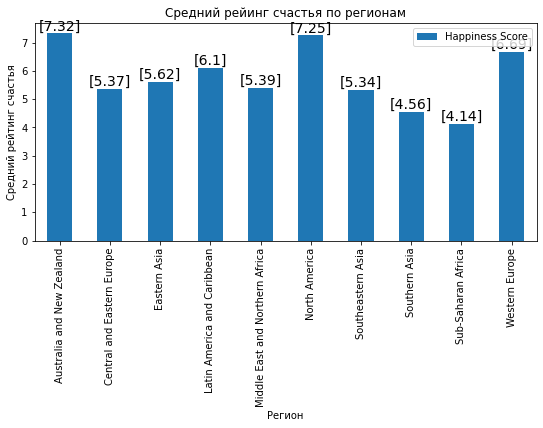

In [70]:
happiness_by_region.plot(kind='bar', 
                         title='Средний рейинг счастья по регионам')

plt.xlabel('Регион')
plt.ylabel('Средний рейтинг счастья')
for i, val in enumerate(happiness_by_region.values):
    plt.text(i, val, val.round(2), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})

Наибольший показатель счастья в регионах "Australia and New Zealand" и "North America", а наименьший в регионах "Southern Asia" и "Sub-Saharan Africa"

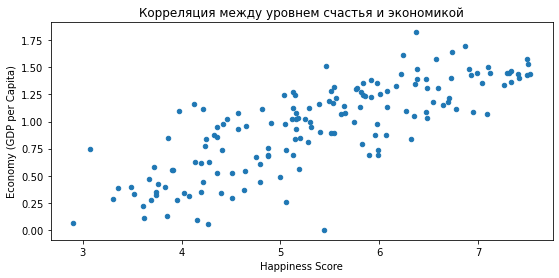

In [71]:
# посмотрим на взаимосвязь оценок счастья и экономикой
df.plot(kind='scatter', 
        x='Happiness Score', 
        y='Economy (GDP per Capita)', 
        title='Корреляция между уровнем счастья и экономикой')
plt.show()

Можно выдвинуть гипотезу, что показатели экономики и уровень счастья имеют значительную корреляцию


Хочу еще проверить почему вверху рейтинга мы видим страны Западной Европы, но в целом этот регион проигрывает регионам Северной Америки и Австралии

In [73]:
happiness_westeur = df[df['Region']=='Western Europe']
happiness_aus = df[df['Region']=='Australia and New Zealand']
happiness_NA = df[df['Region']=='North America']

<AxesSubplot:title={'center':'Распределение оценки счастья в регионе "Западная Европа"'}, ylabel='Frequency'>

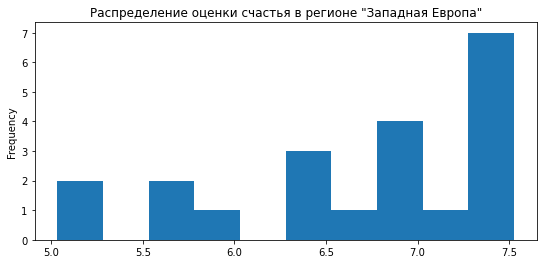

In [74]:
happiness_westeur['Happiness Score'].plot(kind='hist', 
                     title='Распределение оценки счастья в регионе "Западная Европа"')

<AxesSubplot:title={'center':'Распределение оценки счастья в регионе "Австралия и Новая Зеландия"'}, ylabel='Frequency'>

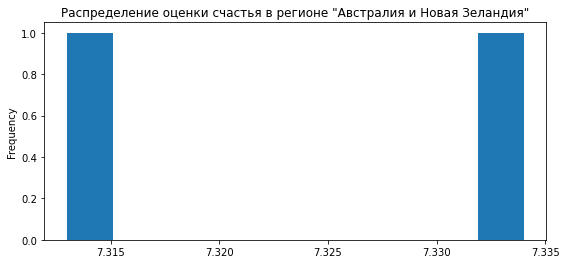

In [75]:
happiness_aus['Happiness Score'].plot(kind='hist', 
                     title='Распределение оценки счастья в регионе "Австралия и Новая Зеландия"')

<AxesSubplot:title={'center':'Распределение оценки счастья в Северной Америке'}, ylabel='Frequency'>

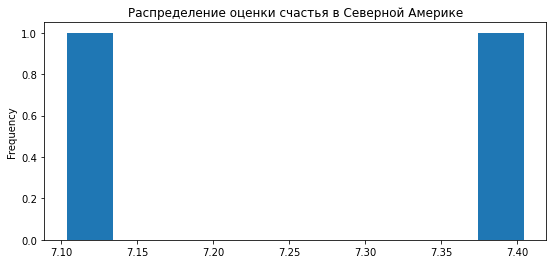

In [76]:
happiness_NA['Happiness Score'].plot(kind='hist', 
                     title='Распределение оценки счастья в Северной Америке')

В регионах лидерах страны имеют приблизительно одинаковую высокую оценку счастья.
В тоже время можно отметить тенденцию, что в Западной Европе неравномерно люди дают оценку счастья и нужно более прицельно изучить, что же дает более высокую оценку счастья в ряде стран этого региона.

In [77]:
import seaborn as sns

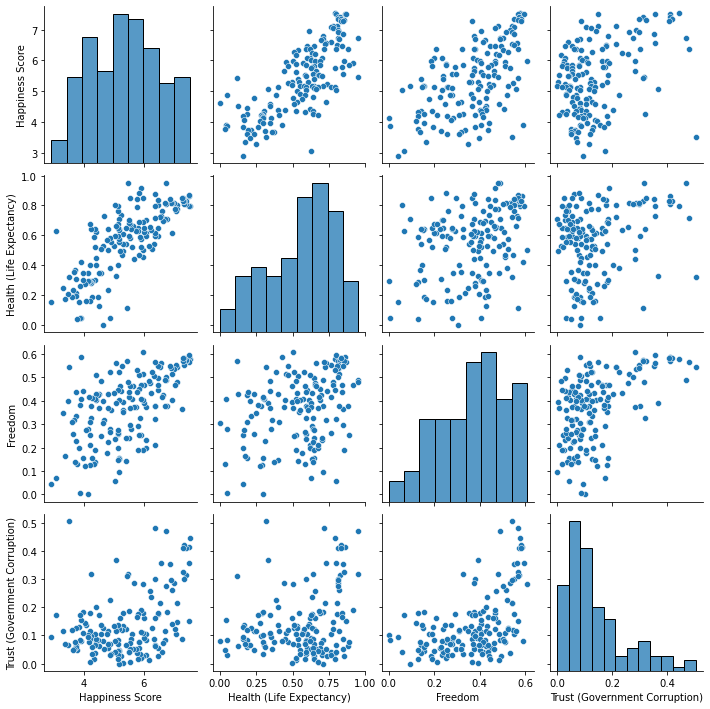

In [79]:
sns.pairplot(df[['Happiness Score', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)']])

Согласно данным диаграммам в большей степени корреляция уровня счастья идет с показателями здоровья и свободы, а вот с уровнем доверия к власти не так четко корреляция прослеживается

<AxesSubplot:xlabel='Region', ylabel='Happiness Score'>

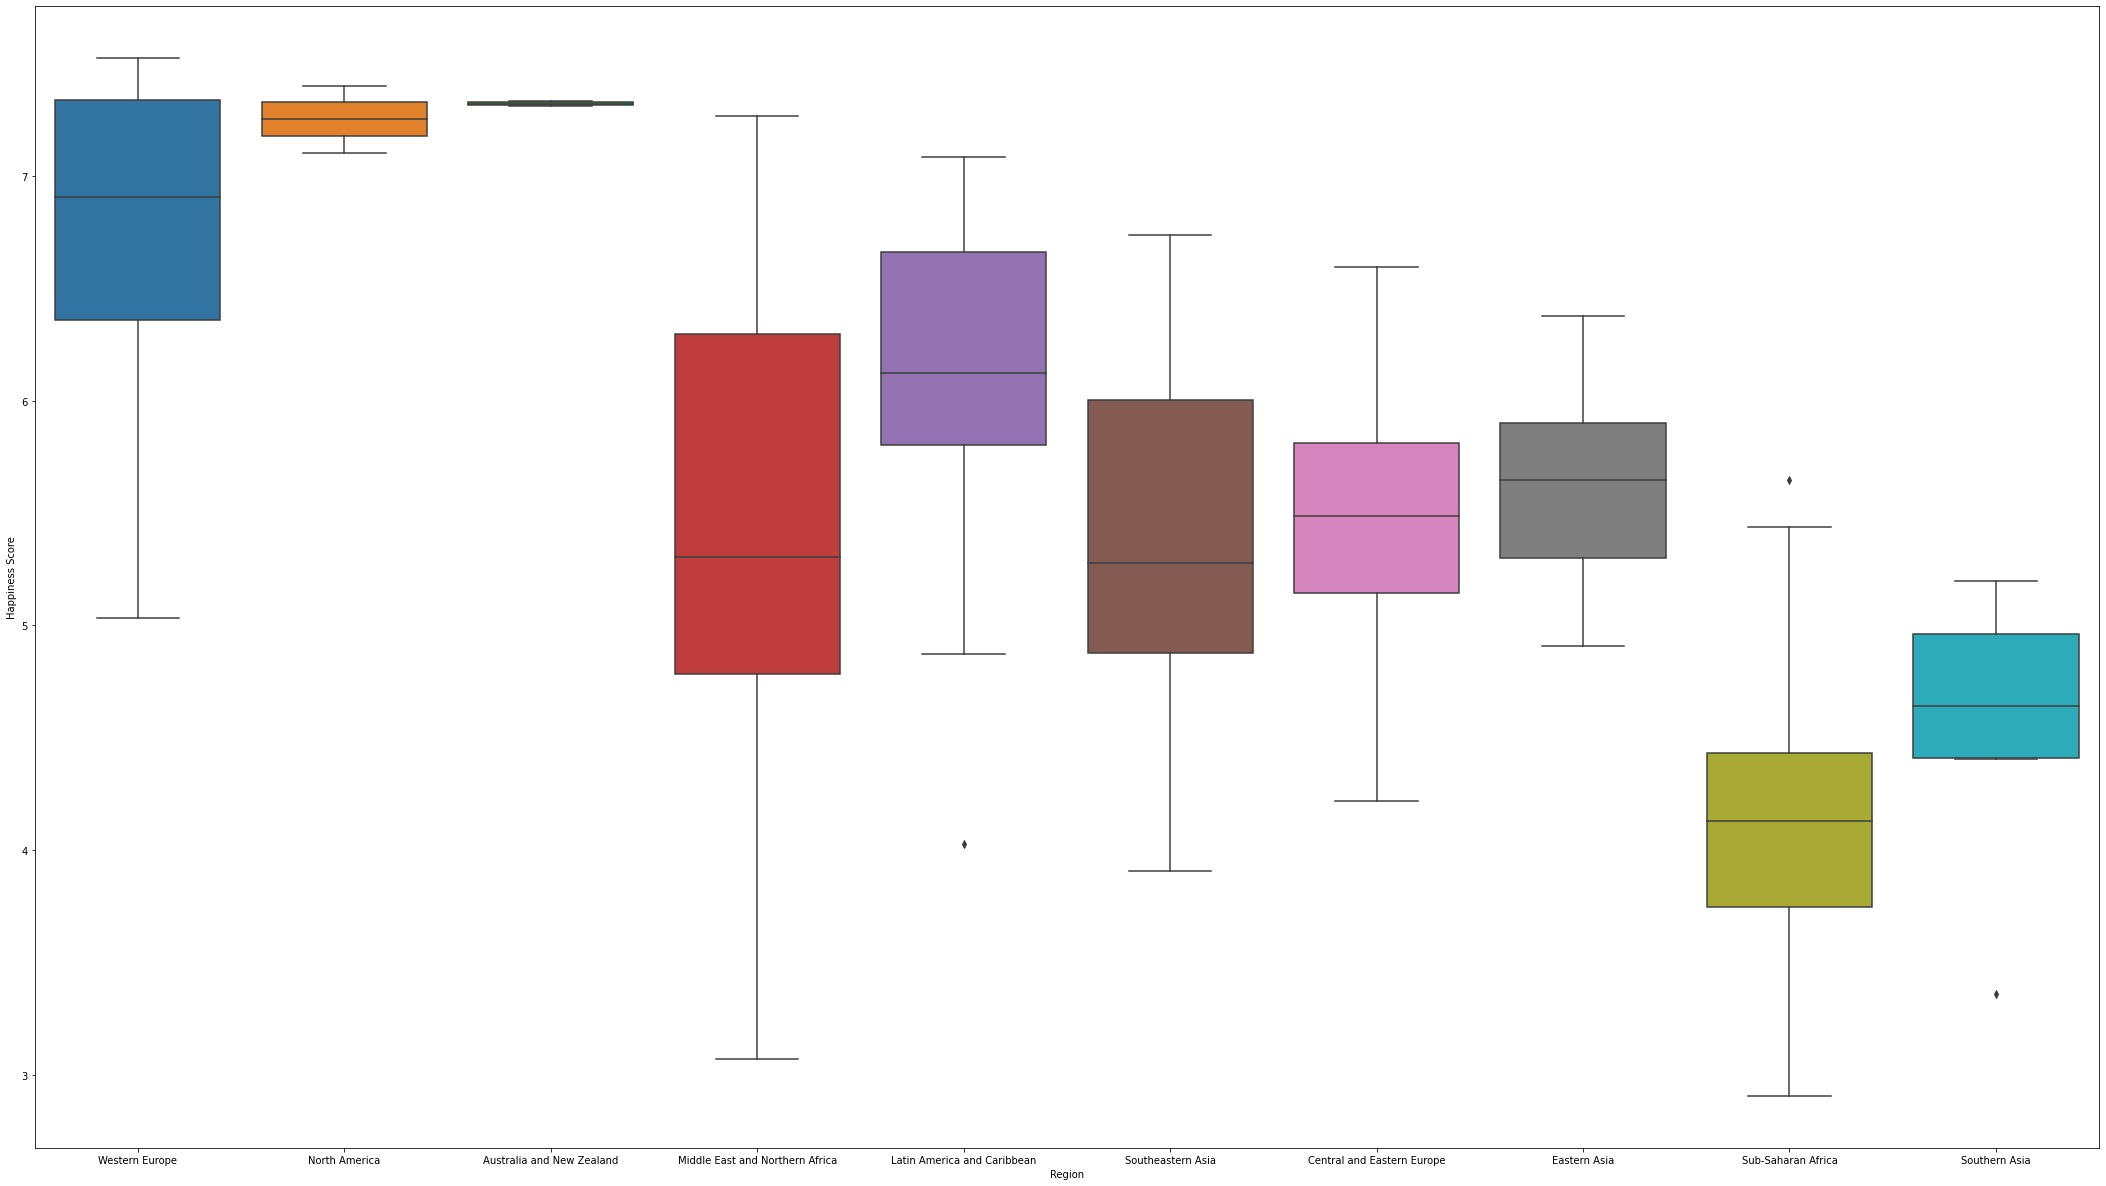

In [84]:
plt.figure(figsize = (37,21))
sns.boxplot(x="Region", y="Happiness Score", 
            data=df[['Region', 'Happiness Score']])

Самый большой разброс оценок счастья в регионе "Middle East and Northern Africa" ввиду серьезных отклонений от средних значений, а также поискать корреляцию в показателях тех стран, которые показывают очень высокие оценки, которые схожи с показателями в регионах-лидерахю А также здесь подтверждается гипотеза, что очень неравномерно распределена оценка счастья с регионе "Western Europe".

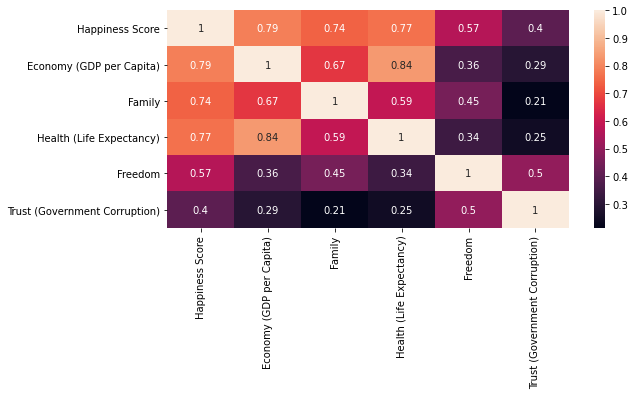

In [85]:
cols = ['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)']
hm = sns.heatmap(df[cols].corr(),
                 cbar=True,
                 annot=True)

На тепловой карте видна корреляция показателя Happiness Score с показателями 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)' в большей степени, но нужно посмотреть по регионам отдельно

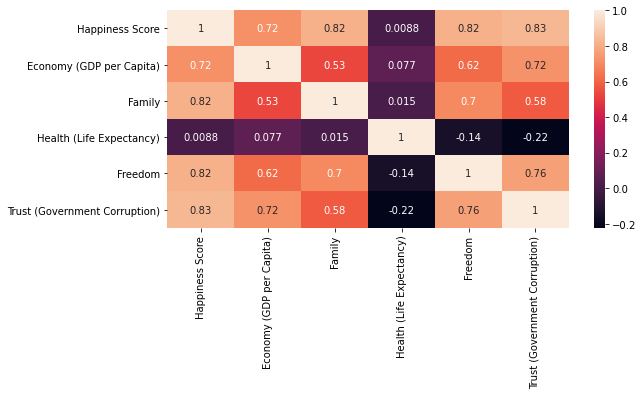

In [86]:
hm = sns.heatmap(df[df['Region']=='Western Europe'][cols].corr(),
                 cbar=True,
                 annot=True)

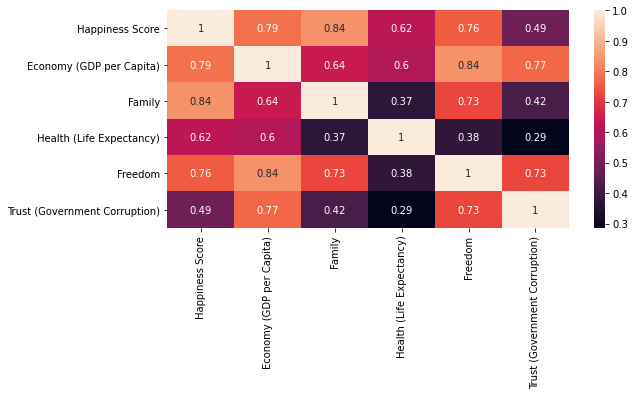

In [87]:
hm = sns.heatmap(df[cols][df['Region']=='Middle East and Northern Africa'].corr(),
                 cbar=True,
                 annot=True)

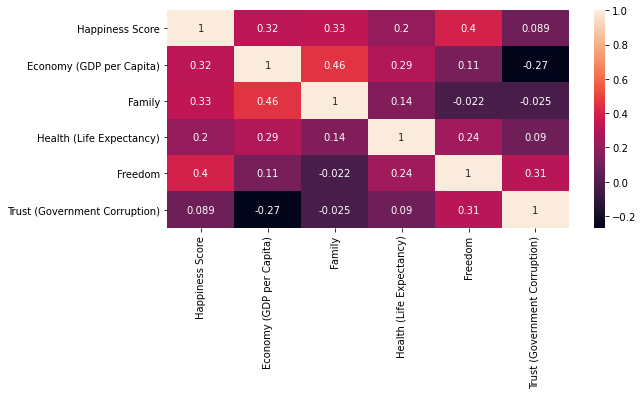

In [88]:
hm = sns.heatmap(df[cols][df['Region']=='Sub-Saharan Africa'].corr(),
                 cbar=True,
                 annot=True)

Детально видно как по регионам разнятся ценности на основании коррелиции разных показателей с Happiness Score